In [1]:
import os
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import plotly as ply
import plotly.express as px
%matplotlib inline
from HelperFn import colpercent,colpercount,zeroper, data_eval, row_na_list,index_retrieve


In [2]:
os.getcwd()
# pd.read_csv("")

'/Users/ptero793/Desktop/capstone'

In [3]:
os.chdir("/Users/ptero793/Downloads")

In [6]:
df = pd.read_csv("nyc_census_tracts.csv")
df_loc = pd.read_csv("census_block_loc.csv")
df_loc.shape

(38396, 5)

In [70]:
df_loc.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


<ipython-input-49-92a4c8700bcd>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [61]:
def func(x):
    y= str(x.BlockCode)
    return int(y[0:11])

In [64]:
df_loc['census_tract']=df_loc.apply(func,axis=1)

In [65]:
df_loc.shape

(38396, 6)

In [71]:
df.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [72]:
len(sorted(df_loc.BlockCode.unique(),reverse=True))

20406

In [73]:
len(sorted(df.CensusTract.unique(),reverse=True))

2167

In [4]:
df.dtypes

NameError: name 'df' is not defined

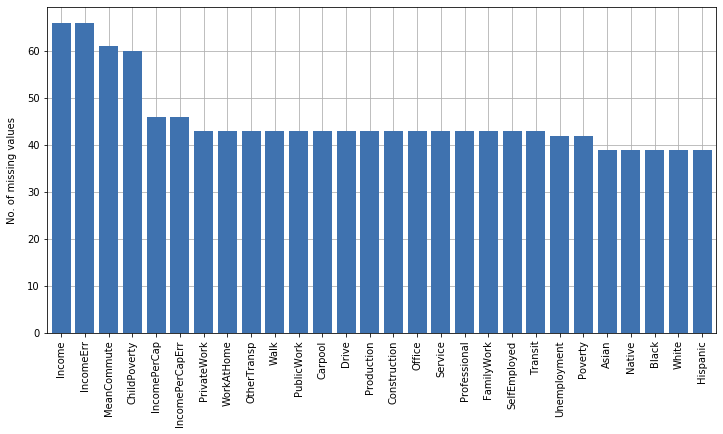

In [33]:
#select all the na values, sum them, sort descending
nans = df.isna().sum().sort_values(ascending=False)
#filter them for columns w/ na
nans = nans[nans > 0]
#create plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [84]:
df.Income.describe()

count      2101.000000
mean      59101.320800
std       28802.662945
min        9829.000000
25%       39073.000000
50%       54505.000000
75%       73272.000000
max      244375.000000
Name: Income, dtype: float64

In [3]:
row_na_list(df)

NameError: name 'df' is not defined

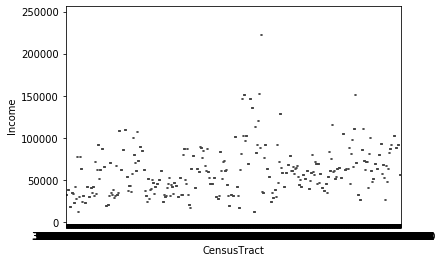

In [103]:
sb.boxplot(x='CensusTract', y='Income', data=df)

In [5]:
colpercent(df)

NameError: name 'df' is not defined

In [8]:
#train not defined
colpercount(df,)

Income
---------------


NameError: name 'train' is not defined

In [7]:
zeroper(df,0.2)

27
-------------------------------------------------------
Percent of zeroes:  ('TotalPop', 1.7997231195200738)
-------------------------------------------------------
Percent of zeroes:  ('Men', 2.030456852791878)
-------------------------------------------------------
Percent of zeroes:  ('Women', 1.8920166128287956)
-------------------------------------------------------
Percent of zeroes:  ('Hispanic', 0.6922011998154131)
-------------------------------------------------------
Percent of zeroes:  ('White', 2.2611905860636825)
-------------------------------------------------------
Percent of zeroes:  ('Black', 7.014305491462852)
-------------------------------------------------------
Percent of zeroes:  ('Native', 78.81864328564836)
-------------------------------------------------------
Percent of zeroes:  ('Asian', 9.090909090909092)
-------------------------------------------------------
Percent of zeroes:  ('Citizen', 1.7997231195200738)
----------------------------------------

['TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Citizen',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'Employed',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

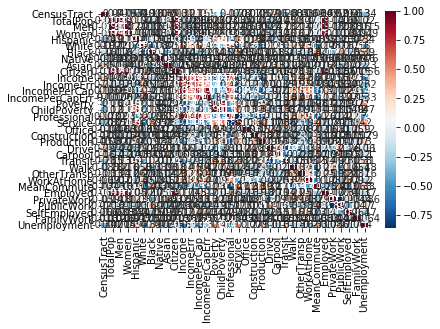

In [100]:
#quick collinearity gut check for continuous variables

remove_nas = df.dropna(axis=0)
corr = remove_nas.corr(method = 'pearson')

fig_size = 20
corr_map= sb.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.4)

In [ ]:
#imputation
# train_copy['MSZoning'] = train_copy.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [97]:
index_retrieve(df,0.4,'pearson')



Number of correlations with value greater than 0.4: 88
----------------------------------------
index labels:  Men TotalPop
value at index:  0.9816386727677209
----------------------------------------
index labels:  Women TotalPop
value at index:  0.9858994222565508
----------------------------------------
index labels:  Citizen TotalPop
value at index:  0.9300814333163115
----------------------------------------
index labels:  Employed TotalPop
value at index:  0.9176896434029527
----------------------------------------
index labels:  TotalPop Men
value at index:  0.9816386727677209
----------------------------------------
index labels:  Women Men
value at index:  0.9358771131209571
----------------------------------------
index labels:  Citizen Men
value at index:  0.8980437319181394
----------------------------------------
index labels:  Employed Men
value at index:  0.906524669343343
----------------------------------------
index labels:  TotalPop Women
value at index:  0.985899422

value at index:  0.5271065520023819


[('Men', 'TotalPop'),
 ('Women', 'TotalPop'),
 ('Citizen', 'TotalPop'),
 ('Employed', 'TotalPop'),
 ('TotalPop', 'Men'),
 ('Women', 'Men'),
 ('Citizen', 'Men'),
 ('Employed', 'Men'),
 ('TotalPop', 'Women'),
 ('Men', 'Women'),
 ('Citizen', 'Women'),
 ('Employed', 'Women'),
 ('Poverty', 'Hispanic'),
 ('ChildPoverty', 'Hispanic'),
 ('Service', 'Hispanic'),
 ('Income', 'White'),
 ('IncomePerCap', 'White'),
 ('IncomePerCapErr', 'White'),
 ('Professional', 'White'),
 ('MeanCommute', 'Black'),
 ('PublicWork', 'Black'),
 ('TotalPop', 'Citizen'),
 ('Men', 'Citizen'),
 ('Women', 'Citizen'),
 ('Employed', 'Citizen'),
 ('White', 'Income'),
 ('IncomeErr', 'Income'),
 ('IncomePerCap', 'Income'),
 ('IncomePerCapErr', 'Income'),
 ('Professional', 'Income'),
 ('Income', 'IncomeErr'),
 ('IncomePerCap', 'IncomeErr'),
 ('IncomePerCapErr', 'IncomeErr'),
 ('Professional', 'IncomeErr'),
 ('White', 'IncomePerCap'),
 ('Income', 'IncomePerCap'),
 ('IncomeErr', 'IncomePerCap'),
 ('IncomePerCapErr', 'IncomePerCap